In [144]:
%config Completer.use_jedi = False

In [1]:
import stac
import numpy as np
from rasterio.windows import Window
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import date, datetime

%matplotlib inline

from dask.distributed import Client
import xarray as xr

from eocube import DataCube, config

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"

---
### Testando o STAC
---

In [2]:
stac_service = stac.STAC(
            config.STAC_URL,
            access_token=config.ACCESS_TOKEN
        )

In [4]:
config.STAC_URL

'https://brazildatacube.dpi.inpe.br/stac/'

In [5]:
query = {
                'collections': "CB4_64_16D_STK-1",
                'bbox': [-54.8657,-14.1046,-52.7673,-12.2541],
                'datetime': '2018-08-01/2019-07-31',
                'limit': 30
            }

In [6]:
stac_service.catalog

['S2-MOSAIC-PARAIBA_10_3M_STK-1',
 'CB4-MOSAIC-BRAZIL_64_3M_STK-1',
 'MOD13Q1-6',
 'CB4A-MOSAIC-PARAIBA_55_3M_STK-1',
 'CB4MUX_20-1',
 'LC8SR-1',
 'CB4MUX_20_1M_STK-1',
 'LC8_DN-1',
 'LC8_30-1',
 'S2_MSI_L2_SR_LASRC-1',
 'KD_S2_20M_VISBANDS_CURUAI-1',
 'LC8_30_6M_MEDSTK-1',
 'LC8-MOSAIC-BRAZIL_30_6M_MEDSTK-1',
 'MYD13Q1-6',
 'LC8_30_16D_STK-1',
 'CB4_64_16D_STK-1',
 'CB4_64-1',
 'CB4_20_1M_STK-1',
 'S2_10_16D_STK-1',
 'S2-SEN2COR_10_16D_STK-1',
 'LCC_C4_64_1M_STK_PA-SPC-AC-NA-1',
 'LCC_S2_10_1M_STK_PA-SPC-AC-NA-1',
 'LCC_L8_30_1M_STK_PA-SPC-AC-NA-1',
 'S2_10-1',
 'S2_L1C-1',
 'CB4-MUX-L4-SR-CMPAC-COG-1',
 'LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1',
 'LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA-1']

In [7]:
stac_service.collections

{'S2_MSI_L2_SR_LASRC-1': {'id': 'S2_MSI_L2_SR_LASRC-1',
  'stac_version': '0.9.0',
  'stac_extensions': ['commons', 'datacube', 'version'],
  'title': 'Sentinel-2 - MSI - L2A - LaSRC ',
  'version': 1,
  'deprecated': False,
  'description': 'This Image Collection contains the images from the collection S2_L1C images processed to Surface Reflectance through Landsat Ecosystem Disturbance Adaptive Processing System (LEDAPS) v3.4.0 using Function of Mask (Fmask) 4.2 cloud mask',
  'license': '',
  'properties': {'eo:gsd': 20.0,
   'eo:bands': [{'name': 'EVI',
     'common_name': 'evi',
     'description': 'Enhanced Vegetation Index',
     'min': -10000.0,
     'max': 10000.0,
     'nodata': -9999.0,
     'scale': 0.0001,
     'center_wavelength': None,
     'full_width_half_max': None,
     'data_type': 'int16'},
    {'name': 'sr_band6',
     'common_name': 'rededge',
     'description': '',
     'min': 0.0,
     'max': 10000.0,
     'nodata': -9999.0,
     'scale': 0.0001,
     'center_w

In [8]:
type(stac_service)

stac.stac.STAC

In [9]:
items1 = stac_service.search(query)

In [10]:
items1

name,common_name,min,max,nodata,scale,data_type
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16
CLEAROB,ClearOb,1.0,255.0,0.0,1.0,uint8
CMASK,quality,0.0,4.0,255.0,1.0,uint8
EVI,evi,-10000.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,-10000.0,10000.0,-9999.0,0.0001,int16
PROVENANCE,Provenance,1.0,366.0,-1.0,1.0,int16
TOTALOB,TotalOb,1.0,255.0,0.0,1.0,uint8


In [11]:
type(items1.features) #Esse está sendo o retorno do getItens() do eocube

list

---
### Testando o EOcube
---

In [12]:
eocube_service = DataCube()

In [13]:
print(eocube_service.getCollections())

['S2_MSI_L2_SR_LASRC-1', 'S2_L1C-1', 'LC8SR-1', 'LC8_DN-1', 'MOD13Q1-6', 'MYD13Q1-6', 'S2_10_16D_STK-1', 'S2-SEN2COR_10_16D_STK-1', 'S2_10-1', 'CB4MUX_20-1', 'CB4MUX_20_1M_STK-1', 'LC8_30-1', 'LC8_30_16D_STK-1', 'CB4_20_1M_STK-1', 'LC8_30_6M_MEDSTK-1', 'CB4_64_16D_STK-1', 'CB4_64-1', 'CB4-MUX-L4-SR-CMPAC-COG-1', 'CB4A-MOSAIC-PARAIBA_55_3M_STK-1', 'S2-MOSAIC-PARAIBA_10_3M_STK-1', 'CB4-MOSAIC-BRAZIL_64_3M_STK-1', 'KD_S2_20M_VISBANDS_CURUAI-1', 'LC8-MOSAIC-BRAZIL_30_6M_MEDSTK-1', 'LCC_S2_10_1M_STK_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_PA-SPC-AC-NA-1', 'LCC_L8_30_1M_STK_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_MT_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_GO_PA-SPC-AC-NA-1', 'LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA-1']


In [14]:
collection = eocube_service.getCollections()[14]
print(eocube_service.getDescription(collection)['descriptions'][0]['description'])

This datacube was generated with all available images surface reflectance from Landsat-8 OLI, with 10 meters of spatial resolution, reprojected and cropped to BDC_MD grid, considering a temporal compositing function of 16 days using the best pixel approach (Stack). According to the NASA's web site, The Operational Land Imager (OLI) sensor provide seasonal coverage of the global landmass at a spatial resolution of 30 meters (visible, NIR, SWIR) and can revisit the same location on Earth surface each 16 days. For more information on Landsat-8, please, see https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-overview. This dataset was processed and made available by the Brazil Data Cube project, a component of the Environmental Monitoring of Brazilian Biomes project, funded by the Amazon Fund through the financial collaboration of the Brazilian Development Bank (BNDES) and the Foundation for Science, Technology and Space Applications (FUNCATE) no. 17.2.0536.1.


In [38]:
bbox = [-56.5009689, -10.7164420, -56.3526535, -10.8238641] # Mato Grosso
# bbox = [-46.01348876953125, -23.08478515994374, -45.703125, -23.34856015148709] # Interior de SP São José

items = eocube_service.getItems(
    collections=["CB4_64_16D_STK-1"],
    bbox=bbox,
    start_date="2018-08-01",
    end_date="2019-07-31"
)

In [16]:
items[0]['assets']

{'EVI': {'href': 'https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/020023/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_020023_2019-07-28_2019-08-12_EVI.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV',
  'type': 'image/tiff; application=geotiff; profile=cloud-optimized',
  'roles': ['data'],
  'created': '2020-11-06T10:00:23',
  'updated': '2020-11-06T10:00:23',
  'bdc:size': 196776596,
  'raster_size': {'x': 10504, 'y': 6865},
  'bdc:chunk_size': {'x': 512, 'y': 512},
  'checksum:multihash': '122037de78a80b9a4798e1d0e232d891f2659d5e88b5273aecdc6b05a4740b49f375',
  'eo:bands': [6]},
 'NDVI': {'href': 'https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/020023/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_020023_2019-07-28_2019-08-12_NDVI.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV',
  'type': 'image/tiff; application=geotiff; profile=cloud-optimized',
  'roles': ['data'],
  'created': '2020-11-06T10:00:26',
  'updated': '2

In [17]:
print(items[0]['assets']['BAND13']['href'])

https://brazildatacube.dpi.inpe.br/data/d006/Mosaic/CB4_64_16D_STK/v001/020023/2019-07-28_2019-08-12/CB4_64_16D_STK_v001_020023_2019-07-28_2019-08-12_BAND13.tif?access_token=a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV


In [18]:
eocube_service.createCube()

True

In [19]:
print(f'Numero de itens no cubo: {len(eocube_service.getCube())}')

Numero de itens no cubo: 24


In [39]:
eocube_service.getCube()[0].getRGB()


array([[[0.50829748, 0.47082175, 0.82011243],
        [0.50952674, 0.47637952, 0.8244847 ],
        [0.50522434, 0.47558555, 0.82073704],
        ...,
        [0.5218193 , 0.49384676, 0.92004997],
        [0.53103872, 0.48511314, 0.90443473],
        [0.52673632, 0.48034934, 0.89006871]],

       [[0.5064536 , 0.46526399, 0.82323548],
        [0.50706822, 0.47637952, 0.84322299],
        [0.50399508, 0.47717348, 0.83822611],
        ...,
        [0.51690227, 0.50138944, 0.93004372],
        [0.52796558, 0.50019849, 0.91942536],
        [0.54087277, 0.50019849, 0.92567146]],

       [[0.50829748, 0.46764589, 0.82948157],
        [0.51505839, 0.47995236, 0.8507183 ],
        [0.51198525, 0.48709805, 0.85883823],
        ...,
        [0.51813153, 0.49424375, 0.92692067],
        [0.52735095, 0.48908297, 0.91130543],
        [0.53288261, 0.49265582, 0.92317302]],

       ...,

       [[0.45359557, 0.44859071, 0.77076827],
        [0.45175169, 0.4442239 , 0.78013741],
        [0.45298095, 0

In [21]:
list(eocube_service.getCube()[0].bands)

['blue',
 'green',
 'red',
 'nir',
 'ClearOb',
 'quality',
 'evi',
 'ndvi',
 'Provenance',
 'TotalOb']

In [22]:
array_rgb = np.zeros((6865, 10504, 3))

In [23]:
imageblue = eocube_service.getCube()[1].item.read(band_name = "BAND13")
imagered = eocube_service.getCube()[1].item.read(band_name = "BAND15")
imagegreen = eocube_service.getCube()[1].item.read(band_name = "BAND14")

In [24]:
array_rgb[:, :, 0] = imagered / imagered.max()
array_rgb[:, :, 1] = imagegreen / imagegreen.max()
array_rgb[:, :, 2] = imageblue / imageblue.max()

In [25]:
imagered.shape

(6865, 10504)

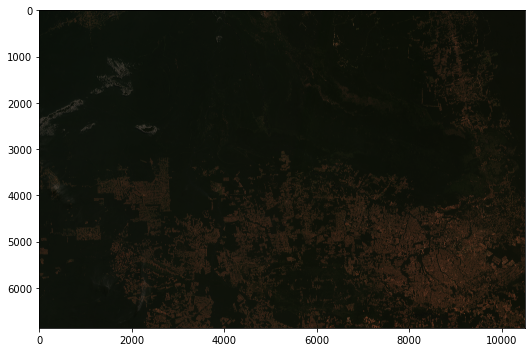

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(array_rgb)
plt.tight_layout()
plt.show()

In [33]:
array_rgb1 = np.zeros((500, 500, 3))

In [34]:

red = eocube_service.getCube()[1].getBand('red')
green = eocube_service.getCube()[1].getBand('green')
blue = eocube_service.getCube()[1].getBand('blue')

In [35]:
array_rgb1[:, :, 0] = red / red.max()
array_rgb1[:, :, 1] = green / green.max()
array_rgb1[:, :, 2] = blue / blue.max()

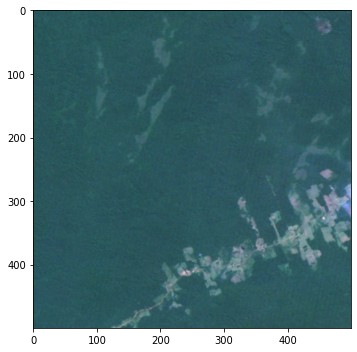

In [36]:
plt.figure(figsize=(10, 5))
plt.imshow(array_rgb1)
plt.tight_layout()

plt.show()

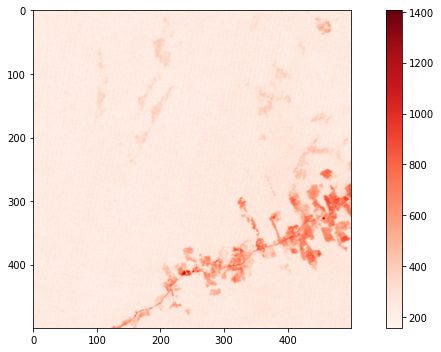

In [40]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Reds', 1000)
plt.imshow(
    red,
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

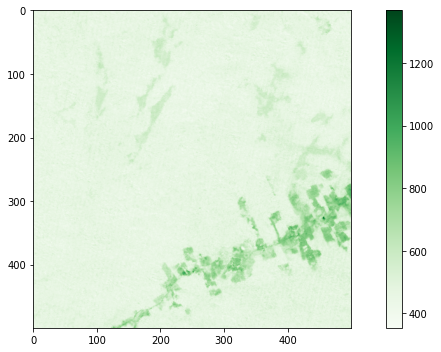

In [44]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greens', 1000)
plt.imshow(
    green,
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

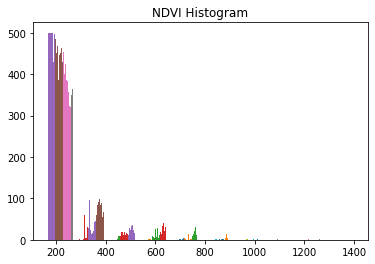

In [46]:
plt.title("NDVI Histogram")
plt.hist(red)
plt.show()

In [48]:
item = eocube_service.getCube()[0].getBand('red')
item.shape

(500, 500)

---
### Testando o GDAL #Não está funcinando
---

In [ ]:
#from osgeo import
import gdal

In [ ]:
dataset = gdal.Open('/my-documents/Downloads/LCC_C4_64_1M_STK_MT_RF_PA-SPC-AC-NA_v001_042050_2018-09-01_2019-08-31.tif', gdal.GA_ReadOnly)

In [ ]:
type(dataset)

In [ ]:
GT = dataset.GetGeoTransform()

---
### Testando o Xarray
---

### Está sendo passado um np array com um array da banda red definido anteriormente em coordenadas está sendo passado uma lista contendo listas

In [42]:
data = eocube_service.getCube()[0].getBand('red')
location = eocube_service.getCube()[0].bbox
date = eocube_service.getCube()[0].item["properties"]["datetime"]
date

'2019-07-28T00:00:00'

In [43]:
print(len(data),len(data[0]))

500 500


In [49]:
print('número total de elementos da matriz:',np.array(data).size)
print('Dimensões da matriz:',np.array(data).shape)
print('número de dimensões da matriz:',np.array(data).ndim)

número total de elementos da matriz: 250000
Dimensões da matriz: (500, 500)
número de dimensões da matriz: 2


In [50]:
locs = location.split(',')
locs

['-56.5009689', '-10.8238641', '-56.3526535', '-10.716442']

In [51]:
longs = [float(locs[0]) for i in range(190)]

lats = [float(locs[1]) for i in range(248)]

times = [date]


###  * Criando a relação do indice espacial do raster com a latitude e longitude

In [52]:
latlong = []
for i in range(190):
    aux=[]
    for j in range(248):
        aux.append(([longs[i],lats[j]]))
    latlong.append(aux)
latlong = np.array(latlong, dtype=np.float64)

In [442]:
latlong[0][0]

array([-56.5009689, -10.8238641])

### Exemplos

In [53]:
print("Será feito um print da localizações espaciais do raster:")
for i in range(3):
    for j in range(3):
        print(f'data[{i}][{j}] - {latlong[i][j]} \t')
    print('\n')

Será feito um print da localizações espaciais do raster:
data[0][0] - [-56.5009689 -10.8238641] 	
data[0][1] - [-56.5009689 -10.8238641] 	
data[0][2] - [-56.5009689 -10.8238641] 	


data[1][0] - [-56.5009689 -10.8238641] 	
data[1][1] - [-56.5009689 -10.8238641] 	
data[1][2] - [-56.5009689 -10.8238641] 	


data[2][0] - [-56.5009689 -10.8238641] 	
data[2][1] - [-56.5009689 -10.8238641] 	
data[2][2] - [-56.5009689 -10.8238641] 	




---
### Criando agora as dimensões do DataArray

In [ ]:
longitude = [latlong[0][0][0] for i in range(190) ]
latitude = [latlong[0][0][1] for i in range(248) ]

In [ ]:
space = dict(space = (["lat","long"], latlong[0][0]),
             time = times,
    )
space

In [ ]:

foo = xr.DataArray(np.array([data]), coords= [times,longitude,latitude],
    dims=["time", "long","lat"],attrs = items[0])
foo

---
### Testando a criação de um cubo com Xarray

In [ ]:
datar = eocube_service.getCube()[0].getBand('red')
datag = eocube_service.getCube()[0].getBand('green')
datab = eocube_service.getCube()[0].getBand('blue')


location = eocube_service.getCube()[0].bbox
date = eocube_service.getCube()[0].item["properties"]["datetime"]
date
times = [date]


In [ ]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})

In [ ]:
data

In [ ]:
temp = 15 + 8 * np.random.randn(2, 2, 3)

precip = 10 * np.random.rand(2, 2, 3)

lon = [[-99.83, -99.32], [-99.79, -99.23]]

lat = [[42.25, 42.21], [42.63, 42.59]]

# for real use cases, its good practice to supply array attributes such as
# units, but we won't bother here for the sake of brevity
ds = xr.Dataset(
        {
            "temperature": (["x", "y", "time"], temp),
            "precipitation": (["x", "y", "time"], precip),
        },
        coords={
            "lon": (["x", "y"], lon),
            "lat": (["x", "y"], lat),
           "time": pd.date_range("2014-09-06", periods=3),
            "reference_time": pd.Timestamp("2014-09-05"),
         },
    )

ds

In [ ]:
red = eocube_service.getCube()[0].getBand("red")
blue = eocube_service.getCube()[0].getBand("blue")

<hr style="border:1px solid #0077b9;">

## <span style="color:#336699">Criando um Cubo de dados com Xarray</span>


<hr style="border:1px solid #0077b9;">

In [470]:
eocube_service.getCube()

In [54]:
red=[]
timered=[]
for i in range(0,len(eocube_service.getCube())):
    red.append(eocube_service.getCube()[i].getBand("red"))
    timered.append(eocube_service.getCube()[i].item["properties"]["datetime"])

In [471]:
timered

['2019-07-28T00:00:00',
 '2019-07-12T00:00:00',
 '2019-06-26T00:00:00',
 '2019-06-10T00:00:00',
 '2019-05-25T00:00:00',
 '2019-05-09T00:00:00',
 '2019-04-23T00:00:00',
 '2019-04-07T00:00:00',
 '2019-03-22T00:00:00',
 '2019-03-06T00:00:00',
 '2019-02-18T00:00:00',
 '2019-02-02T00:00:00',
 '2019-01-17T00:00:00',
 '2019-01-01T00:00:00',
 '2018-12-19T00:00:00',
 '2018-12-03T00:00:00',
 '2018-11-17T00:00:00',
 '2018-11-01T00:00:00',
 '2018-10-16T00:00:00',
 '2018-09-30T00:00:00',
 '2018-09-14T00:00:00',
 '2018-08-29T00:00:00',
 '2018-08-13T00:00:00',
 '2018-07-28T00:00:00']

In [55]:
blue=[]
timeblue=[]
for i in range(0,len(eocube_service.getCube())):
    blue.append(eocube_service.getCube()[i].getBand("blue"))
    timeblue.append(eocube_service.getCube()[i].item["properties"]["datetime"])

In [56]:
green=[]
timegreen=[]
for i in range(0,len(eocube_service.getCube())):
    green.append(eocube_service.getCube()[i].getBand("green"))
    timegreen.append(eocube_service.getCube()[i].item["properties"]["datetime"])

In [472]:
eocube_service.getCube()[0].getBand("red").shape[0]

500

In [58]:
longs = [float(locs[0]) for i in range(500)]

lats = [float(locs[1]) for i in range(500)]


In [123]:
longs = []
lats= []
for i in range(eocube_service.getCube()[0].getBand("red").shape[0]):
        lats.append(eocube_service.getCube()[0]._afim(0,i,'red')[0])
for i in range(eocube_service.getCube()[0].getBand("red").shape[1]):
    longs.append(eocube_service.getCube()[0]._afim(i,0,'red')[1])

In [476]:
print(lats[0], longs[0])
red[0][0][0]

-60.49865285173746 -7.149711677610474


827

In [115]:
print(round(eocube_service.getCube()[0]._afim(1,0,'red')[0],4))
print(round(eocube_service.getCube()[0]._afim(2,0,'red')[0],4))
print(round(eocube_service.getCube()[0]._afim(3,0,'red')[0],4))
print(round(eocube_service.getCube()[0]._afim(4,0,'red')[0],4))
print(round(eocube_service.getCube()[0]._afim(0,1,'red')[1],4))
print(round(eocube_service.getCube()[0]._afim(0,2,'red')[1],4))
print(round(eocube_service.getCube()[0]._afim(0,3,'red')[1],4))
print(round(eocube_service.getCube()[0]._afim(0,4,'red')[1],4))


-60.4987
-60.4987
-60.4987
-60.4987
-7.1497
-7.1497
-7.1498
-7.1498


In [98]:
eocube_service.getCube()[0].getBand("red").shape[0]

500

In [298]:
eocube_service.getCube()[3]._afim(0,0,'red')

(-60.49865285173746, -7.149711677610474)

In [499]:
datared = xr.DataArray(red, coords=[timered, longs,lats], dims=["time", "long","lat"],)
datablue = xr.DataArray(blue, coords=[timeblue, longs,lats], dims=["time", "long","lat"],)
datagreen = xr.DataArray(green, coords=[timegreen, longs,lats], dims=["time", "long","lat"],)

In [498]:
#foo1 = xr.merge([datared,datablue])
# xr.combine_nested([datared, datablue], concat_dim=None) 
dataset = xr.concat([datared,datablue,datagreen],dim="")
dataset

<xarray.DataArray 'red' (: 3, time: 24, long: 500, lat: 500)>
array([[[[ 827,  829,  822, ...,  849,  864,  857],
         [ 824,  825,  820, ...,  841,  859,  880],
         [ 827,  838,  833, ...,  843,  858,  867],
         ...,
         [ 738,  735,  737, ...,  918,  881,  931],
         [ 732,  734,  737, ...,  911,  903,  932],
         [ 723,  723,  746, ...,  901,  900,  913]],

        [[ 237,  217,  201, ...,  235,  245,  254],
         [ 232,  207,  209, ...,  232,  231,  242],
         [ 208,  207,  219, ...,  230,  237,  235],
         ...,
         [ 242,  248,  232, ...,  265,  253,  265],
         [ 231,  244,  234, ...,  262,  251,  254],
         [ 240,  230,  229, ...,  260,  258,  262]],

        [[ 970,  736,  565, ...,  335,  339,  365],
         [ 924,  739,  624, ...,  346,  333,  332],
         [ 945,  866,  770, ...,  343,  349,  349],
         ...,
...
         ...,
         [ 856,  849,  831, ...,  740,  707,  726],
         [ 841,  835,  815, ...,  734,  709,  704],
         [ 851,  845,  815, ...,  734,  731,  730]],

        [[ 574,  589,  600, ...,  603,  610,  607],
         [ 565,  586,  585, ...,  626,  631,  625],
         [ 570,  585,  584, ...,  621,  610,  612],
         ...,
         [ 571,  576,  556, ...,  599,  623,  622],
         [ 575,  574,  575, ...,  583,  635,  626],
         [ 576,  568,  572, ...,  613,  625,  632]],

        [[ 571,  572,  574, ...,  602,  591,  584],
         [ 567,  585,  586, ...,  587,  604,  604],
         [ 591,  592,  595, ...,  574,  587,  613],
         ...,
         [ 604,  573,  576, ...,  604,  592,  591],
         [ 600,  571,  565, ...,  593,  591,  603],
         [ 589,  592,  596, ...,  597,  599,  630]]]], dtype=int16)
Coordinates:
  * time     (time) <U19 '2019-07-28T00:00:00' ... '2018-07-28T00:00:00'
  * long     (long) float64 -7.15 -7.15 -7.151 -7.151 ... -7.434 -7.434 -7.435
  * lat      (lat) float64 -60.5 -60.5 -60.5 -60.5 ... -60.21 -60.21 -60.21
Dimensions without coordinates:

In [440]:
dataset[1].lat[250]

<xarray.DataArray 'lat' ()>
array(-60.35217794)
Coordinates:
    lat      float64 -60.35

In [61]:
datared.shape

(24, 500, 500)

In [62]:
datared.combine_first(datablue)

<xarray.DataArray (time: 24, long: 500, lat: 500)>
array([[[827, 829, 822, ..., 849, 864, 857],
        [824, 825, 820, ..., 841, 859, 880],
        [827, 838, 833, ..., 843, 858, 867],
        ...,
        [738, 735, 737, ..., 918, 881, 931],
        [732, 734, 737, ..., 911, 903, 932],
        [723, 723, 746, ..., 901, 900, 913]],

       [[237, 217, 201, ..., 235, 245, 254],
        [232, 207, 209, ..., 232, 231, 242],
        [208, 207, 219, ..., 230, 237, 235],
        ...,
        [242, 248, 232, ..., 265, 253, 265],
        [231, 244, 234, ..., 262, 251, 254],
        [240, 230, 229, ..., 260, 258, 262]],

       [[970, 736, 565, ..., 335, 339, 365],
        [924, 739, 624, ..., 346, 333, 332],
        [945, 866, 770, ..., 343, 349, 349],
        ...,
...
        ...,
        [524, 510, 506, ..., 441, 444, 453],
        [524, 507, 511, ..., 443, 444, 447],
        [520, 503, 513, ..., 449, 450, 456]],

       [[378, 366, 351, ..., 369, 364, 347],
        [360, 372, 364, ..., 376, 381, 373],
        [367, 376, 376, ..., 392, 395, 377],
        ...,
        [334, 348, 350, ..., 362, 361, 394],
        [347, 358, 349, ..., 391, 372, 398],
        [355, 358, 361, ..., 420, 418, 402]],

       [[324, 325, 341, ..., 340, 323, 317],
        [342, 334, 339, ..., 329, 319, 327],
        [336, 340, 331, ..., 330, 329, 341],
        ...,
        [311, 310, 327, ..., 292, 292, 302],
        [324, 313, 325, ..., 311, 306, 312],
        [311, 312, 323, ..., 328, 333, 334]]], dtype=int16)
Coordinates:
  * time     (time) <U19 '2019-07-28T00:00:00' ... '2018-07-28T00:00:00'
  * long     (long) float64 -56.5 -56.5 -56.5 -56.5 ... -56.5 -56.5 -56.5 -56.5
  * lat      (lat) float64 -10.82 -10.82 -10.82 -10.82 ... -10.82 -10.82 -10.82

In [ ]:
xr.merge([datared, datablue], compat="no_conflicts")

<hr style="border:1px solid #0077b9;">

### Manipulando o DataArray


<hr style="border:1px solid #0077b9;">


In [443]:
dataset.sel(time='2019-07-12T00:00:00')

<xarray.DataArray (: 3, long: 500, lat: 500)>
array([[[237, 217, 201, ..., 235, 245, 254],
        [232, 207, 209, ..., 232, 231, 242],
        [208, 207, 219, ..., 230, 237, 235],
        ...,
        [242, 248, 232, ..., 265, 253, 265],
        [231, 244, 234, ..., 262, 251, 254],
        [240, 230, 229, ..., 260, 258, 262]],

       [[298, 295, 277, ..., 328, 329, 300],
        [283, 286, 260, ..., 340, 332, 294],
        [285, 284, 274, ..., 321, 323, 313],
        ...,
        [286, 280, 277, ..., 303, 295, 281],
        [292, 288, 284, ..., 278, 293, 295],
        [306, 290, 279, ..., 301, 302, 289]],

       [[475, 484, 490, ..., 469, 461, 471],
        [483, 500, 494, ..., 500, 489, 475],
        [497, 493, 473, ..., 485, 458, 439],
        ...,
        [496, 471, 442, ..., 478, 492, 493],
        [504, 492, 449, ..., 495, 510, 511],
        [522, 511, 470, ..., 505, 543, 548]]], dtype=int16)
Coordinates:
    time     <U19 '2019-07-12T00:00:00'
  * long     (long) float64 -7.15 -7.15 -7.151 -7.151 ... -7.434 -7.434 -7.435
  * lat      (lat) float64 -60.5 -60.5 -60.5 -60.5 ... -60.21 -60.21 -60.21
Dimensions without coordinates:

In [456]:
dataset[0].sel(long=-7.149,lat=-60.49, method="nearest").values[0]

853

In [67]:
dataset[0].sel(time=slice("2018-09-30T00:00:00", "2018-09-14T00:00:00"))

<xarray.DataArray (time: 2, long: 500, lat: 500)>
array([[[ 375,  367,  368, ...,  451,  427,  424],
        [ 377,  369,  360, ...,  455,  447,  430],
        [ 382,  381,  368, ...,  461,  450,  445],
        ...,
        [ 446,  417,  387, ..., 1166,  994,  685],
        [ 388,  379,  374, ...,  881,  837,  593],
        [ 382,  376,  373, ...,  655,  677,  555]],

       [[ 465,  453,  447, ...,  440,  433,  437],
        [ 479,  472,  449, ...,  451,  456,  444],
        [ 490,  488,  472, ...,  449,  447,  441],
        ...,
        [ 450,  450,  444, ...,  431,  450,  446],
        [ 460,  453,  445, ...,  427,  431,  431],
        [ 463,  460,  460, ...,  439,  436,  437]]], dtype=int16)
Coordinates:
  * time     (time) <U19 '2018-09-30T00:00:00' '2018-09-14T00:00:00'
  * long     (long) float64 -56.5 -56.5 -56.5 -56.5 ... -56.5 -56.5 -56.5 -56.5
  * lat      (lat) float64 -10.82 -10.82 -10.82 -10.82 ... -10.82 -10.82 -10.82

In [68]:
dataset[1].sel(time=slice("2018-09-30T00:00:00", "2018-09-14T00:00:00"))

<xarray.DataArray (time: 2, long: 500, lat: 500)>
array([[[ 359,  373,  357, ...,  429,  421,  435],
        [ 366,  367,  367, ...,  436,  438,  449],
        [ 381,  372,  361, ...,  443,  426,  433],
        ...,
        [ 482,  464,  417, ..., 1113, 1074,  723],
        [ 387,  382,  370, ...,  959,  941,  622],
        [ 376,  369,  355, ...,  756,  701,  578]],

       [[ 577,  585,  573, ...,  528,  530,  531],
        [ 589,  579,  567, ...,  513,  544,  534],
        [ 590,  576,  561, ...,  494,  524,  529],
        ...,
        [ 554,  542,  536, ...,  499,  508,  514],
        [ 549,  543,  548, ...,  510,  499,  495],
        [ 548,  548,  548, ...,  521,  512,  506]]], dtype=int16)
Coordinates:
  * time     (time) <U19 '2018-09-30T00:00:00' '2018-09-14T00:00:00'
  * long     (long) float64 -56.5 -56.5 -56.5 -56.5 ... -56.5 -56.5 -56.5 -56.5
  * lat      (lat) float64 -10.82 -10.82 -10.82 -10.82 ... -10.82 -10.82 -10.82

In [128]:
dataset.sel(long=-60.49, method="nearest") #arrumar amanha e colocar valores unicos

<xarray.DataArray (: 3, time: 24, lat: 500)>
array([[[ 723,  723,  746, ...,  901,  900,  913],
        [ 240,  230,  229, ...,  260,  258,  262],
        [ 656,  654,  693, ...,  824,  757,  703],
        ...,
        [ 520,  503,  513, ...,  449,  450,  456],
        [ 355,  358,  361, ...,  420,  418,  402],
        [ 311,  312,  323, ...,  328,  333,  334]],

       [[1264, 1245, 1213, ..., 1449, 1444, 1431],
        [ 306,  290,  279, ...,  301,  302,  289],
        [ 666,  652,  707, ...,  770,  725,  743],
        ...,
        [ 830,  836,  831, ...,  628,  613,  618],
        [ 333,  328,  336, ...,  388,  400,  381],
        [ 384,  355,  385, ...,  384,  404,  386]],

       [[1125, 1120, 1107, ..., 1312, 1326, 1298],
        [ 522,  511,  470, ...,  505,  543,  548],
        [ 889,  898,  955, ..., 1214, 1087,  981],
        ...,
        [ 851,  845,  815, ...,  734,  731,  730],
        [ 576,  568,  572, ...,  613,  625,  632],
        [ 589,  592,  596, ...,  597,  599,  630]]], dtype=int16)
Coordinates:
  * time     (time) <U19 '2019-07-28T00:00:00' ... '2018-07-28T00:00:00'
    long     float64 -7.435
  * lat      (lat) float64 -60.5 -60.5 -60.5 -60.5 ... -60.21 -60.21 -60.21
Dimensions without coordinates:

In [143]:
#pesquisando no dataset apartir da posição
print(dataset[0].isel(time=7, lat=250,long=250))
print(dataset[0].isel(time=7, lat=499,long=0))
print(dataset[0].isel(time=7, lat=0,long=499))


<xarray.DataArray ()>
array(366, dtype=int16)
Coordinates:
    time     <U19 '2019-04-07T00:00:00'
    long     float64 -7.293
    lat      float64 -60.35
<xarray.DataArray ()>
array(434, dtype=int16)
Coordinates:
    time     <U19 '2019-04-07T00:00:00'
    long     float64 -7.15
    lat      float64 -60.21
<xarray.DataArray ()>
array(554, dtype=int16)
Coordinates:
    time     <U19 '2019-04-07T00:00:00'
    long     float64 -7.435
    lat      float64 -60.5


In [189]:
 dataset[0].isel(time=1, lat=0,long=5).values


array(231, dtype=int16)

In [158]:
dataset[0][1].values.max()

1407

In [335]:
#pode ser adicionado a opção de plotar lado a lado
def stemp(data,lat,long,time,*bands):
    lista = []
    tempo = [datetime.strptime(item, '%Y-%m-%dT%H:%M:%S').date().strftime("%Y-%m-%d") for item in dataset.time.values]
    for band in bands:
        for i in range(time):
            lista.append(data[band].isel(time=i,lat=lat,long=long).values)

    #plt.figure(figsize=(8,8))
    plt.title('Time Series', fontsize=24)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Surface Reflectance', fontsize=16)
    for i in range(len(lista[0])):
        plt.plot(tempo[:time],[pt[i] for pt in lista],ls='-', marker='o',label = 'banda %s'%i)
    plt.legend()
    plt.grid(b=True, color='gray', linestyle='--', linewidth=0.5);
    #fig.autofmt_xdate()
    plt.setp(plt.xticks()[1], rotation=30, ha='right')
    plt.show()    
    #plt.title('Série Temporal')
    #plt.xlabel('Tempo')
    #plt.ylabel('Valor Espectral')
    #plt.plot(tempo[:time],lista )
    #plt.show()
    return lista

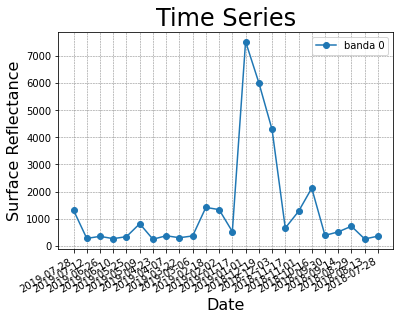

In [459]:
lista = stemp(dataset,250,250,24,[1])

In [297]:
#retorna os valores dos primeiros indicies de uma lista de lista
[item[1] for item in lista]

[1315, 279, 355, 270, 344, 819, 248, 377, 304, 370]

In [355]:
testeconv = xr.DataArray(red, coords=[timered, longs,lats], dims=["time", "long","lat"],name='teste')

In [353]:
att = eocube_service.getDescription('CB4_64_16D_STK-1')['descriptions']

### Plotar Bandas

In [415]:
imred = dataset[0].values
imgreen = dataset[2].values
imblue = dataset[1].values


In [389]:
imred[0].shape

(500, 500)

In [379]:
from ipywidgets import interact

@interact(date=(0, 24, 1))
def p(date=0):
    pass

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

In [422]:
def plotimage(r,g,b):
    for im1,im2,im3 in zip(r,g,b):
        @interact(date=(0, 24, 1))
        def p(date=0):
            
            array_rgb1 = np.zeros((500, 500, 3))
            array_rgb1[:, :, 0] = im1 / im1.max()
            array_rgb1[:, :, 1] = im2 / im2.max()
            array_rgb1[:, :, 2] = im3 / im3.max()
            plt.figure(figsize=(10, 5))
            plt.imshow(array_rgb1)
            plt.tight_layout()
            plt.show()
            array_rgb1= []
            pass

In [423]:
plotimage(imred,imgreen,imblue)

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

interactive(children=(IntSlider(value=0, description='date', max=24), Output()), _dom_classes=('widget-interac…

---
### Convertendo DataArray to Dataframe do Pandas
---

In [356]:
#convertendo a um dataFrame
df = testeconv.isel(time=slice(10)).to_dataframe()

In [360]:
df

teste
time                long      lat              
2019-07-28T00:00:00 -7.149712 -60.498653    827
                              -60.498067    829
                              -60.497481    822
                              -60.496895    828
                              -60.496309    837
...                                         ...
2019-03-06T00:00:00 -7.435059 -60.208629    464
                              -60.208043    496
                              -60.207457    483
                              -60.206871    569
                              -60.206285    632

[2500000 rows x 1 columns]